# Урок 2.  
# Масштабирование признаков.  
# L1- и L2-регуляризация.  
# Стохастический градиентный спуск

На этом уроке мы продолжим исследовать линейные модели,  
узначем, зачем для линейных моделей нужно масштабировать признаки,  
реализуем свою линейную регрессию с регуляризацией  
и усовршенствуем наш алгоритм градиентного спуска, сделав его стохастическим.  
Поехали!

In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]]).T

In [29]:
y = np.array([45, 55, 50, 59, 65, 35, 75, 80, 50, 60])
y.shape

(10,)

# Виды масштабирования признаков

![img/normalization.png](img/normalization.png)

### MinMaxScaler  

$$\large X_{norm} = \frac{X – X_{min}}{X_{max}-X_{min}}$$

In [30]:
X[:,1].min(), X[:,1].max()

(0, 10)

In [31]:
X[:,2].min(), X[:,2].max()

(450, 2000)

In [32]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 1.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [33]:
X_norm[:,1] = (X[:,1] - X[:,1].min()) / (X[:,1].max() - X[:,1].min())
X_norm

array([[1.00e+00, 1.00e-01, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e-01, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e-01, 7.50e+02, 2.00e+00],
       [1.00e+00, 1.00e-01, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e-01, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e-01, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e-01, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e-01, 1.00e+03, 2.00e+00]])

In [34]:
X_norm[:,2] = (X[:,2] - X[:,2].min()) / (X[:,2].max() - X[:,2].min())
X_norm

array([[1.        , 0.1       , 0.03225806, 1.        ],
       [1.        , 0.1       , 0.16129032, 1.        ],
       [1.        , 0.2       , 0.19354839, 2.        ],
       [1.        , 0.1       , 0.09677419, 1.        ],
       [1.        , 0.3       , 0.64516129, 2.        ],
       [1.        , 0.        , 0.22580645, 1.        ],
       [1.        , 0.5       , 0.67741935, 3.        ],
       [1.        , 1.        , 1.        , 3.        ],
       [1.        , 0.1       , 0.        , 1.        ],
       [1.        , 0.2       , 0.35483871, 2.        ]])

### Стандартизация  

$$\large X_{norm} = \frac{X – X_{mean}}{std}$$

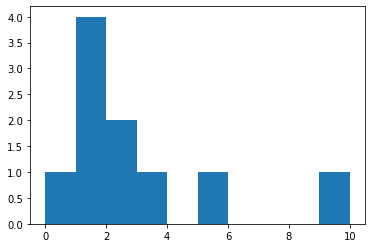

In [35]:
plt.hist(X[:,1]);

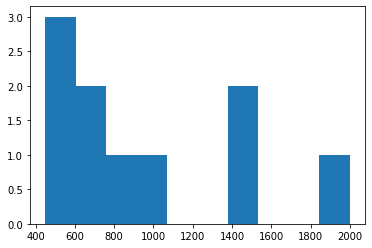

In [36]:
plt.hist(X[:,2]);

In [37]:
X1_mean = X[:,1].mean()
X1_mean

2.6

In [38]:
X1_std = X[:,1].std()
X1_std

2.8000000000000003

In [39]:
X_st = X.copy().astype(np.float64)

In [40]:
X_st[:,1] = (X[:,1] - X1_mean) / X1_std
X_st

array([[ 1.00000000e+00, -5.71428571e-01,  5.00000000e+02,
         1.00000000e+00],
       [ 1.00000000e+00, -5.71428571e-01,  7.00000000e+02,
         1.00000000e+00],
       [ 1.00000000e+00, -2.14285714e-01,  7.50000000e+02,
         2.00000000e+00],
       [ 1.00000000e+00, -5.71428571e-01,  6.00000000e+02,
         1.00000000e+00],
       [ 1.00000000e+00,  1.42857143e-01,  1.45000000e+03,
         2.00000000e+00],
       [ 1.00000000e+00, -9.28571429e-01,  8.00000000e+02,
         1.00000000e+00],
       [ 1.00000000e+00,  8.57142857e-01,  1.50000000e+03,
         3.00000000e+00],
       [ 1.00000000e+00,  2.64285714e+00,  2.00000000e+03,
         3.00000000e+00],
       [ 1.00000000e+00, -5.71428571e-01,  4.50000000e+02,
         1.00000000e+00],
       [ 1.00000000e+00, -2.14285714e-01,  1.00000000e+03,
         2.00000000e+00]])

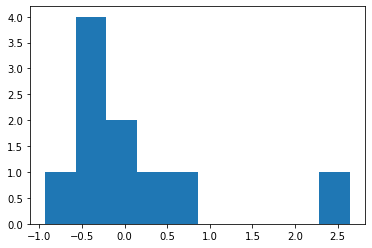

In [41]:
plt.hist(X_st[:,1]);

In [42]:
def custom_StandardScaler(x):
    res = (x - x.mean()) / x.std()
    return res

In [43]:
X_st[:,2] = custom_StandardScaler(X[:,2])

In [44]:
X_st[:,3] = custom_StandardScaler(X[:,3])
X_st

array([[ 1.        , -0.57142857, -0.97958969, -0.89625816],
       [ 1.        , -0.57142857, -0.56713087, -0.89625816],
       [ 1.        , -0.21428571, -0.46401617,  0.38411064],
       [ 1.        , -0.57142857, -0.77336028, -0.89625816],
       [ 1.        ,  0.14285714,  0.97958969,  0.38411064],
       [ 1.        , -0.92857143, -0.36090146, -0.89625816],
       [ 1.        ,  0.85714286,  1.08270439,  1.66447944],
       [ 1.        ,  2.64285714,  2.11385144,  1.66447944],
       [ 1.        , -0.57142857, -1.08270439, -0.89625816],
       [ 1.        , -0.21428571,  0.05155735,  0.38411064]])

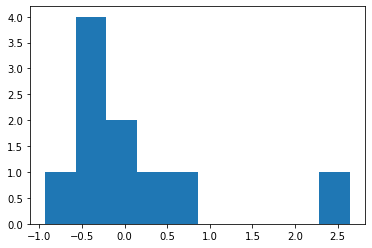

In [45]:
plt.hist(X_st[:,1]);

# SGD

![img/lr_gradient_descent.gif](img/lr_gradient_descent.gif)

Как нейронные сети обучаются с помощью градиентного спуска:  
https://www.youtube.com/watch?v=IHZwWFHWa-w

In [46]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [47]:
def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations+1):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X)))
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [48]:
eval_model(X_st, y, iterations=1000, alpha=1e-2)

# итерация: 100, MSE: 102.50744106000177, веса: [49.69164866  4.53544333  3.89765866  3.1677628 ]
# итерация: 200, MSE: 41.46547296917875, веса: [56.37772187  4.80973502  3.50031437  3.32941062]
# итерация: 300, MSE: 40.21498138214589, веса: [57.26442593  5.02878983  3.15908646  3.45624229]
# итерация: 400, MSE: 40.069632432734025, веса: [57.38202023  5.21106118  2.87399939  3.56286006]
# итерация: 500, MSE: 39.98106021966477, веса: [57.39761553  5.36280052  2.63585047  3.65244765]
# итерация: 600, MSE: 39.91952217402521, веса: [57.39968377  5.48915963  2.43691769  3.72767768]
# итерация: 700, MSE: 39.87661388961645, веса: [57.39995806  5.59441191  2.27074784  3.79081539]
# итерация: 800, MSE: 39.846692345629, веса: [57.39999444  5.68210436  2.13194852  3.84377768]
# итерация: 900, MSE: 39.82582664152905, веса: [57.39999926  5.75518271  2.01601398  3.88818435]
# итерация: 1000, MSE: 39.81127585866649, веса: [57.3999999   5.81609462  1.9191796   3.9254024 ]


array([57.3999999 ,  5.81609462,  1.9191796 ,  3.9254024 ])

In [49]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    n_batch = n // qty_in_batch
    if n % qty_in_batch != 0:
        n_batch += 1
    for i in range(1, iterations+1):
        for b in range(n_batch):
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
            X_tmp = X[start_ : end_, :]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(X_tmp, W)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp)))
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [50]:
eval_sgd_model(X_st, y, iterations=5000, qty_in_batch=5, alpha=1e-2)

# итерация: 500, MSE: 41.33971503203832, веса: [57.39621366  5.52445083  2.42911712  3.72598951]
# итерация: 1000, MSE: 39.49983789970524, веса: [57.39810755  5.89249454  1.82984319  3.96350532]
# итерация: 1500, MSE: 38.77035102763333, веса: [57.39791849  6.04168731  1.58668895  4.06002854]
# итерация: 2000, MSE: 38.47767573785116, веса: [57.39784176  6.10218562  1.48803132  4.09922755]
# итерация: 2500, MSE: 38.35946407422404, веса: [57.39781064  6.12672319  1.44800267  4.11514054]
# итерация: 3000, MSE: 38.3115886168036, веса: [57.39779802  6.13667669  1.43176193  4.12159899]
# итерация: 3500, MSE: 38.29217807688498, веса: [57.39779289  6.14071456  1.42517265  4.12421986]
# итерация: 4000, MSE: 38.28430491245621, веса: [57.39779082  6.1423527   1.42249922  4.12528333]
# итерация: 4500, MSE: 38.281110918666926, веса: [57.39778997  6.1430173   1.42141455  4.12571483]
# итерация: 5000, MSE: 38.27981509256783, веса: [57.39778963  6.14328694  1.42097448  4.12588991]


array([57.39778963,  6.14328694,  1.42097448,  4.12588991])

### Регуляризация  

По сути, регуляризация - это ограничение модели.  
Для нас это, прежде всего, способ уменьшить сложность модели, чтобы предотвратить переобучение.
Проблема: признаки могут иметь линейную (или почти линейную) зависимость.  
Если у нас есть такие признаки, модель будет не устойчива к изменению в данных (большой variance).  
Чтобы побороть этот эффект, модель при обучении дополнительно ограничивают, используя **регуляризацию**.

Подробнее здесь:  
https://habr.com/ru/company/ods/blog/323890/  
и здесь:  
https://habr.com/ru/company/ods/blog/322076/  

L1 регуляризация

$$\Large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right)  + \lambda \sum_{j=1}^m \left| w_j \right|$$

L2 регуляризация

$$\Large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right) + \lambda \frac{1}{2} \sum_{j=1}^m w_j^2$$

In [51]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations+1):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X) + lambda_ * W) 
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [52]:
eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

# итерация: 500, MSE: 39.98166412253417, веса: [57.39479705  5.10767868  2.46037345  4.08674902]
# итерация: 1000, MSE: 39.80723120406396, веса: [57.39713005  5.765859    1.85689028  4.03893236]
# итерация: 1500, MSE: 39.782405042800356, веса: [57.39713014  5.99060723  1.60529698  4.06885866]
# итерация: 2000, MSE: 39.778523565788895, веса: [57.39713014  6.07152025  1.50155606  4.09300748]
# итерация: 2500, MSE: 39.77788748617128, веса: [57.39713014  6.10185559  1.45905205  4.10572941]
# итерация: 3000, MSE: 39.777779304702584, веса: [57.39713014  6.11355928  1.44170275  4.11160375]
# итерация: 3500, MSE: 39.77775983405893, веса: [57.39713014  6.11816175  1.43463681  4.11416107]
# итерация: 4000, MSE: 39.777755943216036, веса: [57.39713014  6.11999396  1.43176283  4.1152412 ]
# итерация: 4500, MSE: 39.77775502451415, веса: [57.39713014  6.12072893  1.43059479  4.11568989]
# итерация: 5000, MSE: 39.77775476050766, веса: [57.39713014  6.12102515  1.4301203   4.11587451]


array([57.39713014,  6.12102515,  1.4301203 ,  4.11587451])

### Домашнее задание:  
1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).
2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?  
3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации *.

### Задача 1

Создадим функцию, которая будет собирать веса и лямбду по окончанию итерации

In [164]:
def eval_model_reg2_w_collect(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    lambda_array = list()
    W_array = list()
    for j in (1*0.1**exp for exp in range(-1, 9)):
        np.random.seed(42)
        W = np.random.randn(X.shape[1])
        n = X.shape[0]
        for i in range(1, iterations+1):
            y_pred = np.dot(X, W)
            err = calc_mse(y, y_pred)
            W -= alpha * (1/n * 2 * np.dot((y_pred - y), X) + j * W)
            if i % (iterations / 10) == 0:
                print(f'# итерация: {i}, MSE: {err}, веса: {W}')
        lambda_array.append(j)
        W_array.append(W)
    return np.array(lambda_array), np.array(W_array)


Соберем их при помощи созданной функции

In [165]:
lambda_array, W_array = eval_model_reg2_w_collect(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-1)

# итерация: 500, MSE: 2380.6100686583386, веса: [9.56666667 1.42530532 1.35226504 1.37037873]
# итерация: 1000, MSE: 2380.6100686583386, веса: [9.56666667 1.42530532 1.35226504 1.37037873]
# итерация: 1500, MSE: 2380.6100686583386, веса: [9.56666667 1.42530532 1.35226504 1.37037873]
# итерация: 2000, MSE: 2380.6100686583386, веса: [9.56666667 1.42530532 1.35226504 1.37037873]
# итерация: 2500, MSE: 2380.6100686583386, веса: [9.56666667 1.42530532 1.35226504 1.37037873]
# итерация: 3000, MSE: 2380.6100686583386, веса: [9.56666667 1.42530532 1.35226504 1.37037873]
# итерация: 3500, MSE: 2380.6100686583386, веса: [9.56666667 1.42530532 1.35226504 1.37037873]
# итерация: 4000, MSE: 2380.6100686583386, веса: [9.56666667 1.42530532 1.35226504 1.37037873]
# итерация: 4500, MSE: 2380.6100686583386, веса: [9.56666667 1.42530532 1.35226504 1.37037873]
# итерация: 5000, MSE: 2380.6100686583386, веса: [9.56666667 1.42530532 1.35226504 1.37037873]
# итерация: 500, MSE: 409.5421247913339, веса: [38.

# итерация: 2500, MSE: 39.77786771988127, веса: [57.39999971  6.10298562  1.45781137  4.1060667 ]
# итерация: 3000, MSE: 39.77776605586327, веса: [57.39999971  6.11472078  1.44041515  4.11195712]
# итерация: 3500, MSE: 39.7777493349922, веса: [57.39999971  6.11933796  1.43332655  4.11452269]
# итерация: 4000, MSE: 39.77774657967356, веса: [57.39999971  6.12117695  1.43044191  4.11560684]
# итерация: 4500, MSE: 39.77774612531998, веса: [57.39999971  6.12191502  1.42926896  4.11605742]
# итерация: 5000, MSE: 39.77774605037193, веса: [57.39999971  6.12221264  1.42879223  4.11624291]


На основании собранных данных построим график

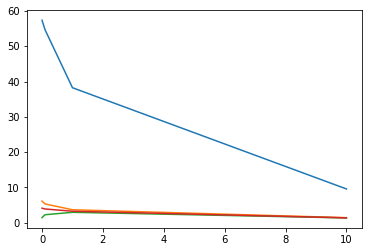

In [166]:
for k in range(0, 4):
    plt.plot(lambda_array, W_array.T[k])
plt.show()

<b>Вывод</b>: чем меньше показатель степени у коэффициента lambda, тем ниже разброс между весами

### Задача 2

Применить к одному и тому же признаку сразу и нормализацию, и стандартизацию невозможно, поскольку нормализация использует относительную шкалу (% от среднего), а стандартизация абсолютную (сдвиг от среднего)

### Задача 3

Формула L1 регуляризации имеет следующий вид:

$$\Large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right)  + \lambda \sum_{j=1}^m \left| w_j \right|$$

В литературе производную из модуля вектор-столбца определяют как столбец, состоящий из чисел -1, 0, 1, знак определяется согласно числу элемента столбца 

Для создания такой матрицы используется метод sign библиотеки numpy 

In [179]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations+1):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X) + lambda_ * np.sign(W))
        if i % (iterations / 10) == 0:
            print(f'# итерация: {i}, MSE: {err}, веса: {W}')
    return W

In [180]:
eval_model_reg1(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-1)

# итерация: 500, MSE: 39.98753873813259, веса: [57.34766765  5.0893263   2.44461657  4.06686007]
# итерация: 1000, MSE: 39.81275594850908, веса: [57.3499999   5.74710458  1.84207396  4.01849149]
# итерация: 1500, MSE: 39.78776053753044, веса: [57.35        5.9717757   1.5907325   4.04823937]
# итерация: 2000, MSE: 39.783792390062835, веса: [57.35        6.05268632  1.48704006  4.07234131]
# итерация: 2500, MSE: 39.783118218788026, веса: [57.35        6.0830318   1.44453381  4.08505533]
# итерация: 3000, MSE: 39.782994056806885, веса: [57.35        6.09474418  1.42717471  4.09093091]
# итерация: 3500, MSE: 39.78296799391677, веса: [57.35        6.0993521   1.42010119  4.09349048]
# итерация: 4000, MSE: 39.78296140268311, веса: [57.35        6.10118731  1.41722267  4.09457219]
# итерация: 4500, MSE: 39.782959381579204, веса: [57.35        6.10192385  1.4160522   4.09502178]
# итерация: 5000, MSE: 39.78295866837946, веса: [57.35        6.10222084  1.41557648  4.09520688]


array([57.35      ,  6.10222084,  1.41557648,  4.09520688])